In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr

In [2]:
data_df = pd.read_csv('C:/Users/MPPhy/OneDrive/Desktop/MDH_MIT/1st SEM/Machine Learning/PML_MDH/Titanic-Dataset.csv')

In [3]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

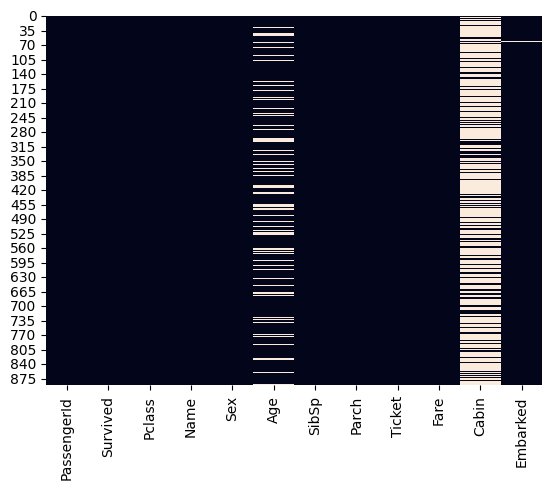

In [6]:
data_df.isnull().sum()
sb.heatmap(data_df.isnull(), cbar=False)

In [7]:
data_missing = (data_df.isnull().mean()*100).round(2)
data_missing

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [8]:
print("Duplicate:", data_df.duplicated().sum)

Duplicate: <bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool>


In [9]:
duplicates = data_df[data_df.duplicated()]
print(f"Total Duplicates: {len(duplicates)}")
duplicates

Total Duplicates: 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [10]:
print(data_df['Sex'].unique())

['male' 'female']


In [11]:
data_df['Sex'] = data_df['Sex'].str.strip().str.lower()
data_df['Sex'] = data_df['Sex'].map({"female": 1, "male": 0})

In [12]:
print(data_df['Sex'].unique())
print(data_df['Sex'].head())

[0 1]
0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64


In [13]:
missing_rows = data_df[data_df['Embarked'].isnull()]
missing_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [14]:
data_df[(data_df['Pclass']==1)].groupby('Embarked')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,85.0,104.718529,99.093935,26.55,49.50,78.2667,110.8833,512.3292
Q,2.0,90.000000,0.000000,90.00,90.00,90.0000,90.0000,90.0000
S,127.0,70.364862,58.811278,0.00,29.25,52.0000,83.4750,263.0000


In [15]:
data_df[
    (data_df['Pclass'] == 1) &
    (data_df['Fare'].between(75, 85))
].groupby('Embarked').size()

Embarked
C    16
S    13
dtype: int64

In [16]:
data_df['Embarked'] = data_df['Embarked'].fillna('S')

In [17]:
cat_col = [col for col in data_df.columns if data_df[col].dtype=='object']
num_col = [col for col in data_df.columns if data_df[col].dtype!='object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

Categorical columns: ['Name', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


In [18]:
num_cols = data_df.select_dtypes(include=['number'])
print(num_cols)

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0              1         0       3    0  22.0      1      0   7.2500
1              2         1       1    1  38.0      1      0  71.2833
2              3         1       3    1  26.0      0      0   7.9250
3              4         1       1    1  35.0      1      0  53.1000
4              5         0       3    0  35.0      0      0   8.0500
..           ...       ...     ...  ...   ...    ...    ...      ...
886          887         0       2    0  27.0      0      0  13.0000
887          888         1       1    1  19.0      0      0  30.0000
888          889         0       3    1   NaN      1      2  23.4500
889          890         1       1    0  26.0      0      0  30.0000
890          891         0       3    0  32.0      0      0   7.7500

[891 rows x 8 columns]


In [19]:
num_cols = num_cols.drop(columns=['PassengerId'])
print(num_cols)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0           0       3    0  22.0      1      0   7.2500
1           1       1    1  38.0      1      0  71.2833
2           1       3    1  26.0      0      0   7.9250
3           1       1    1  35.0      1      0  53.1000
4           0       3    0  35.0      0      0   8.0500
..        ...     ...  ...   ...    ...    ...      ...
886         0       2    0  27.0      0      0  13.0000
887         1       1    1  19.0      0      0  30.0000
888         0       3    1   NaN      1      2  23.4500
889         1       1    0  26.0      0      0  30.0000
890         0       3    0  32.0      0      0   7.7500

[891 rows x 7 columns]


In [20]:
# Detect outliers in Age using IQR
Q1 = data_df['Age'].quantile(0.25)
Q3 = data_df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_df[(data_df['Age'] < lower_bound) | (data_df['Age'] > upper_bound)]
print("Age outliers:")
print(outliers[['Age']])

Age outliers:
      Age
33   66.0
54   65.0
96   71.0
116  70.5
280  65.0
456  65.0
493  71.0
630  80.0
672  70.0
745  70.0
851  74.0


In [21]:
features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [22]:
data_df[features].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


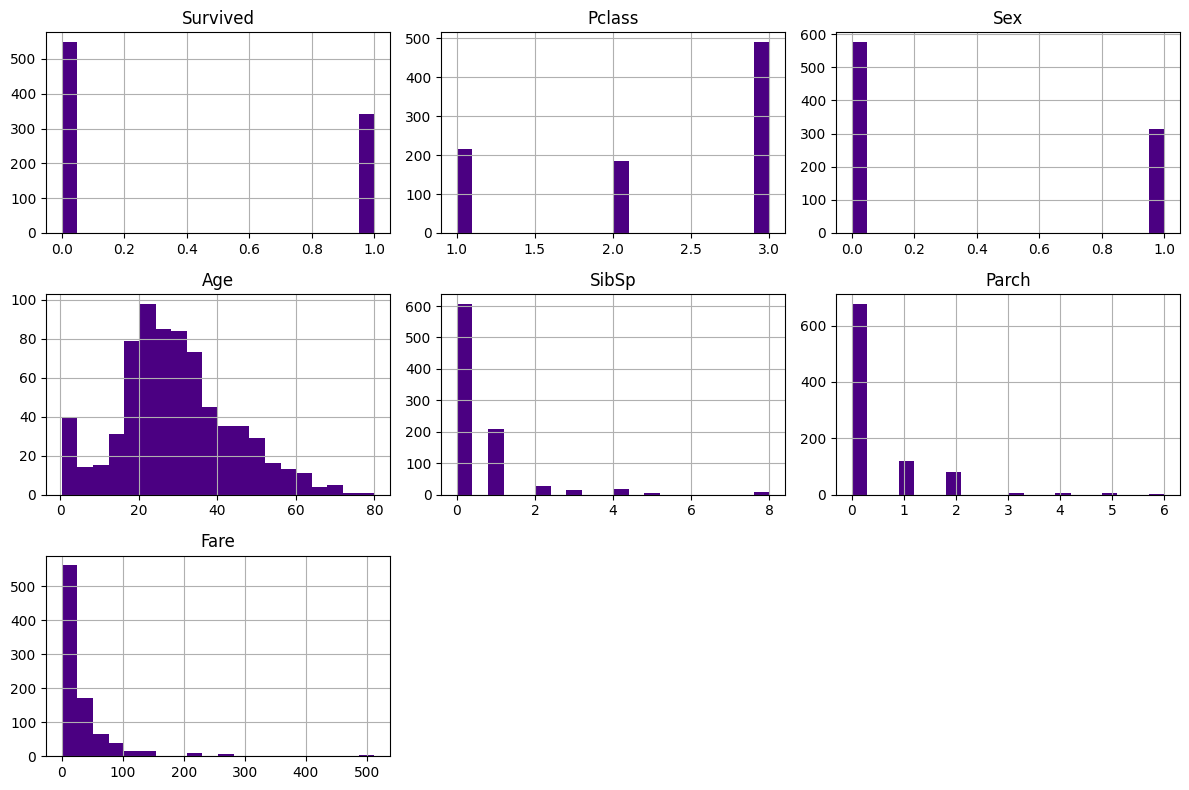

In [23]:
data_df[features].hist(bins=20, figsize=(12,8), color='indigo')
plt.tight_layout()
plt.show()

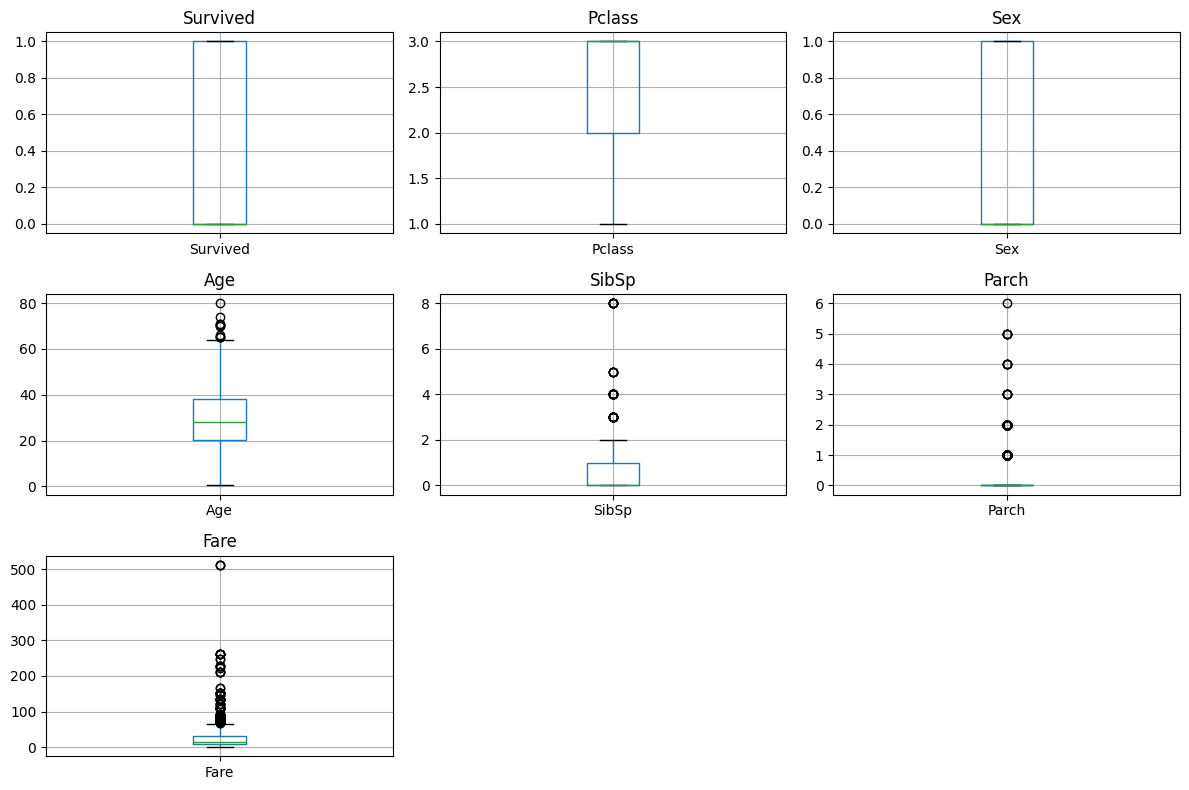

In [24]:
plt.figure(figsize=(12,8))

for i,col in enumerate(features):
    plt.subplot(3,3, i+1)
    data_df.boxplot(column=col)
    plt.title(col)
    
plt.tight_layout()
plt.show()

<Axes: xlabel='Survived', ylabel='Age'>

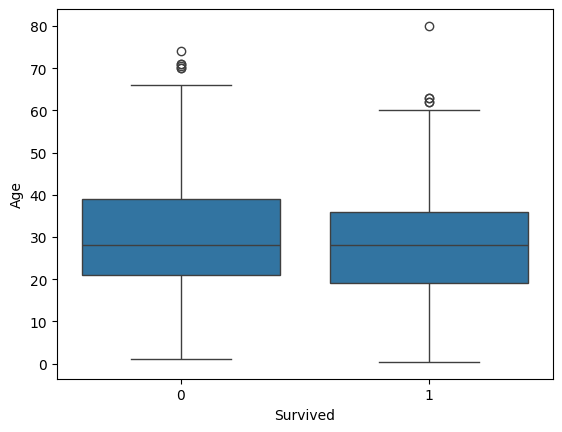

In [25]:
sb.boxplot(x='Survived', y='Age', data=data_df)

<Axes: xlabel='Survived', ylabel='Fare'>

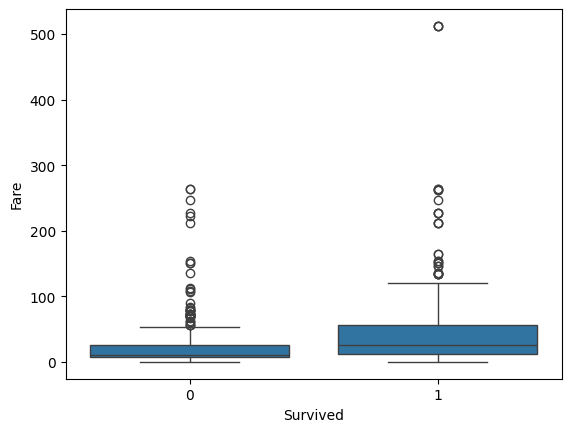

In [26]:
sb.boxplot(x='Survived', y='Fare', data=data_df)

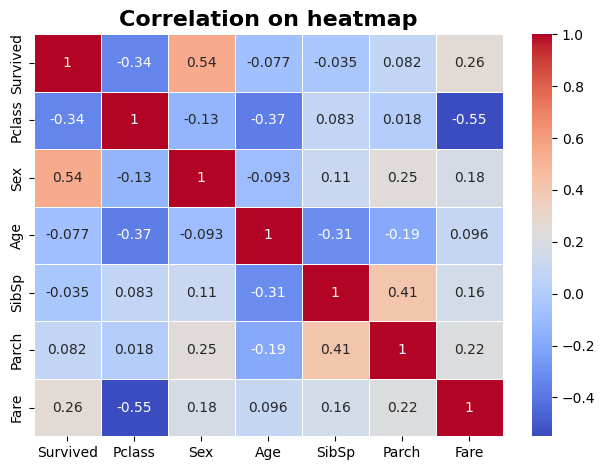

In [27]:
cor1=data_df[features].corr()
sb.heatmap(cor1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation on heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [28]:
correlations = data_df[features].corr()
print(correlations['Survived'].sort_values(ascending=False))

Survived    1.000000
Sex         0.543351
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64


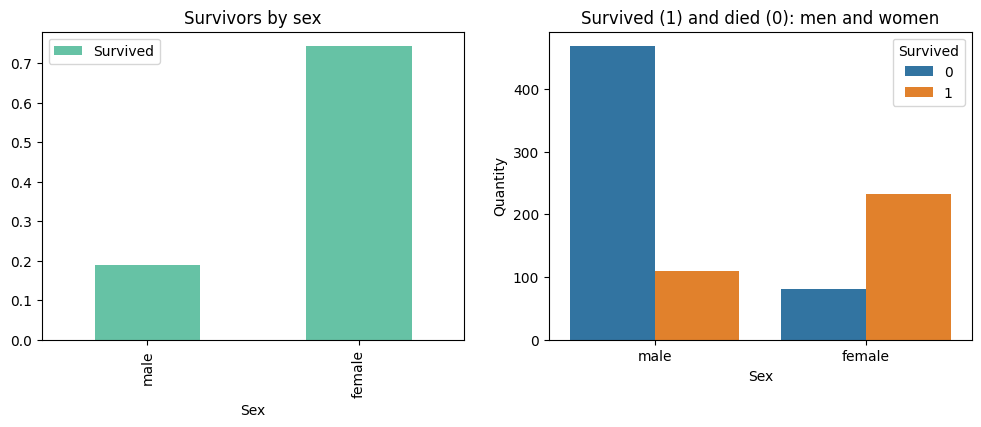

Sex
Male      18.890815
Female    74.203822
Name: Survived, dtype: float64


In [29]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
label_map = {0: "male", 1: "female"}
data_df[['Sex', 'Survived']].groupby(['Sex']).mean().rename(index=label_map).plot.bar(ax=ax[0], colormap='Set2') 
ax[0].set_title('Survivors by sex') 

sb.countplot(x=data_df['Sex'].map(label_map), hue='Survived', data=data_df, ax=ax[1])
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survived (1) and died (0): men and women') 
plt.show()

label_map={0: 'Male', 1: 'Female'}
sex_survival = data_df.groupby('Sex')['Survived'].mean().rename(index=label_map) * 100
print(sex_survival)

In [30]:
sex_counts = data_df['Sex'].value_counts()
print(sex_counts)


Sex
0    577
1    314
Name: count, dtype: int64


In [31]:
label_map={1: 'Class 1', 2: 'Class 2', 3:'Class 3'}
pclass_survival = data_df.groupby('Pclass')['Survived'].mean().rename(index=label_map) * 100
print(pclass_survival)

Pclass
Class 1    62.962963
Class 2    47.282609
Class 3    24.236253
Name: Survived, dtype: float64


In [32]:
pclass_counts = data_df['Pclass'].value_counts()
print(pclass_counts)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [33]:
embarked_counts = data_df['Embarked'].value_counts()
print(embarked_counts)

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64


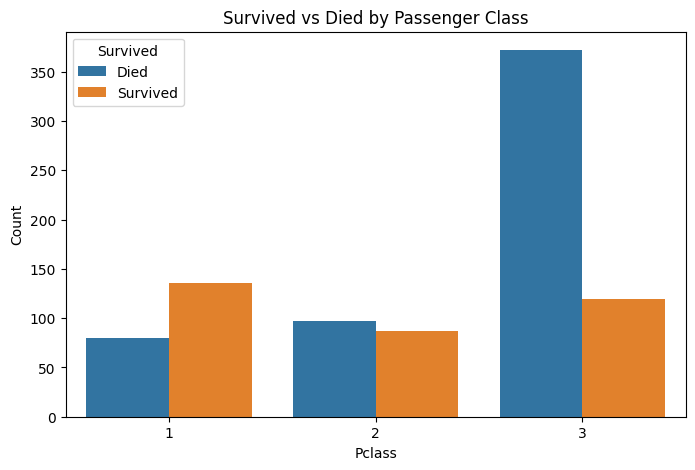

In [34]:
#label_map = {0: 'Died', 1: 'Survived'}
print(data_df.groupby('Pclass')['Survived'].value_counts())
plt.figure(figsize=(8,5))
sb.countplot(data=data_df, x='Pclass', hue='Survived')

plt.title("Survived vs Died by Passenger Class")
plt.ylabel("Count")
plt.xlabel("Pclass")
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()

In [35]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

data_df['AgeGroup'] = pd.cut(data_df['Age'], bins=bins, labels=labels)


C:\Users\MPPhy\AppData\Local\Temp\ipykernel_56524\3240143143.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(


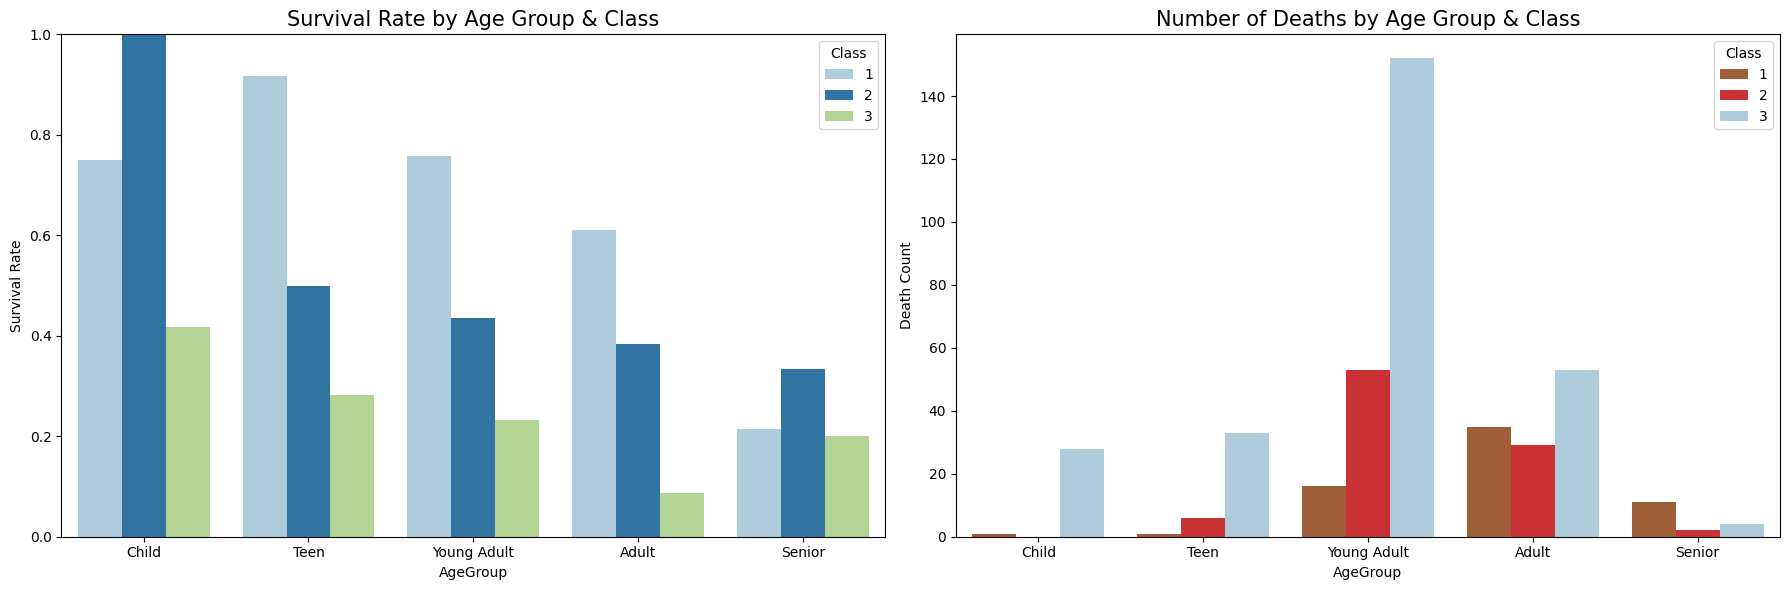

In [36]:
died_df = data_df[data_df['Survived'] == 0]
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Survival Rate
sb.barplot(
    data=data_df,
    x='AgeGroup',
    y='Survived',
    hue='Pclass',
    palette='Paired',
    ci=None,
    ax=axes[0]
)
axes[0].set_title("Survival Rate by Age Group & Class", fontsize=15)
axes[0].set_ylabel("Survival Rate")
axes[0].set_ylim(0, 1)
axes[0].legend(title="Class")

# RIGHT: Death Count 
sb.countplot(
    data=died_df,
    x='AgeGroup',
    hue='Pclass',
    palette='Paired_r',
    ax=axes[1]
)
axes[1].set_title("Number of Deaths by Age Group & Class", fontsize=15)
axes[1].set_ylabel("Death Count")
axes[1].legend(title="Class")

plt.tight_layout()
plt.show()



In [37]:
data_df['AgeGroup'] = data_df['Age'].apply(
    lambda age: "Child" if age < 13 else
                "Teen" if age < 18 else
                "Young Adult" if age < 30 else
                "Adult" if age < 60 else
                "Senior"
    if pd.notnull(age) else "Unknown"
)
age_survival = data_df.groupby('AgeGroup')['Survived'].mean().sort_values(ascending=False) * 100
print(age_survival)

AgeGroup
Child          57.971014
Teen           47.727273
Adult          41.776316
Young Adult    35.055351
Unknown        29.378531
Senior         26.923077
Name: Survived, dtype: float64


Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


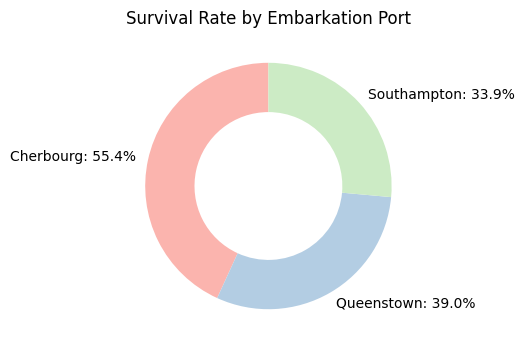

In [38]:
embarked_survival = data_df.groupby('Embarked')['Survived'].mean() * 100
print(embarked_survival)

name_map = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
labels = [f"{name_map[idx]}: {val:.1f}%" 
          for idx, val in embarked_survival.items()]

cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in range(len(embarked_survival))]

plt.figure(figsize=(18,4))
plt.pie(
    embarked_survival, 
    labels=labels, 
    colors=colors,
    wedgeprops={'width':0.4},
    startangle=90)
plt.title("Survival Rate by Embarkation Port")
plt.show()

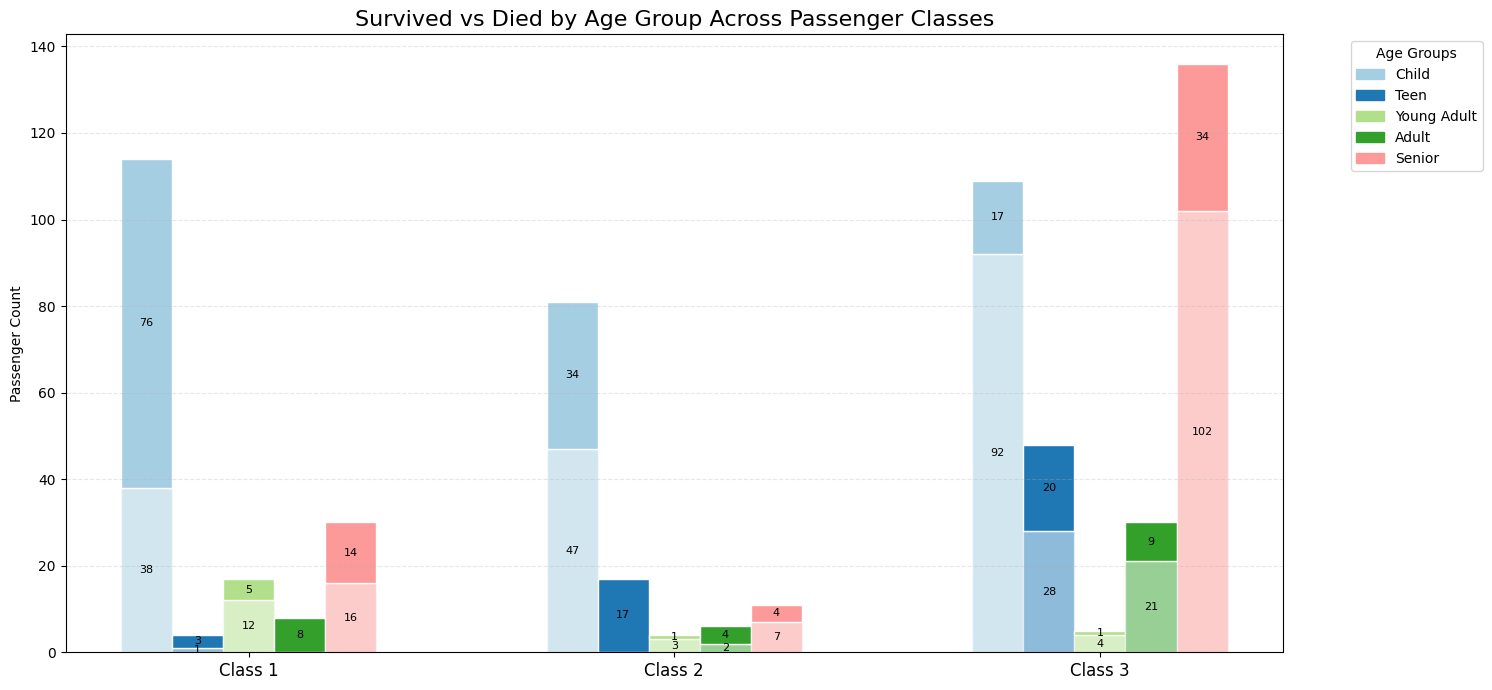

In [39]:
# Cross-tab: AgeGroup vs Pclass & Survived
ct = pd.crosstab([data_df['Pclass'], data_df['AgeGroup']], data_df['Survived'])

classes = [1,2,3]
age_groups = ['Child','Teen','Young Adult','Adult','Senior']

survived = []
died = []

for p in classes:
    class_data = ct.loc[p]
    survived.append(class_data[1].values)
    died.append(class_data[0].values)

survived = np.array(survived)
died = np.array(died)

# Colors per age group
colors = {
    'Child': '#a6cee3',
    'Teen': '#1f78b4',
    'Young Adult': '#b2df8a',
    'Adult': '#33a02c',
    'Senior': '#fb9a99'
}

plt.figure(figsize=(15,7))

x = np.arange(len(classes))
width = 0.12
offsets = np.linspace(-2*width, 2*width, len(age_groups))

# Plot bars + labels
for i, age in enumerate(age_groups):
    # died part
    bars_died = plt.bar(x + offsets[i], died[:, i], width=width,
                        color=colors[age], alpha=0.5, edgecolor='white')

    # survived part
    bars_surv = plt.bar(x + offsets[i], survived[:, i],
                        bottom=died[:, i], width=width,
                        color=colors[age], edgecolor='white')
    
    # Add labels for died
    for bar in bars_died:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2, height/2,
                     f"{int(height)}", ha='center', va='center', fontsize=8)

    # Add labels for survived
    for bar_d, bar_s in zip(bars_died, bars_surv):
        h_d = bar_d.get_height()
        h_s = bar_s.get_height()
        if h_s > 0:
            plt.text(bar_s.get_x() + bar_s.get_width()/2, h_d + h_s/2,
                     f"{int(h_s)}", ha='center', va='center', fontsize=8)

# Legend fix (invisible rectangles)
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[a]) for a in age_groups]

plt.legend(legend_handles, age_groups, title="Age Groups",
           bbox_to_anchor=(1.05,1), loc='upper left')

plt.xticks(x, ['Class 1','Class 2','Class 3'], fontsize=12)
plt.ylabel("Passenger Count")
plt.title("Survived vs Died by Age Group Across Passenger Classes", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [40]:
# Summarize counts
summary = data_df.groupby(['Pclass', 'AgeGroup']).size().unstack(fill_value=0)
summary

AgeGroup,Adult,Child,Senior,Teen,Unknown,Young Adult
Pclass,,,,,,
1,114,4,17,8,30,43
2,81,17,4,6,11,65
3,109,48,5,30,136,163


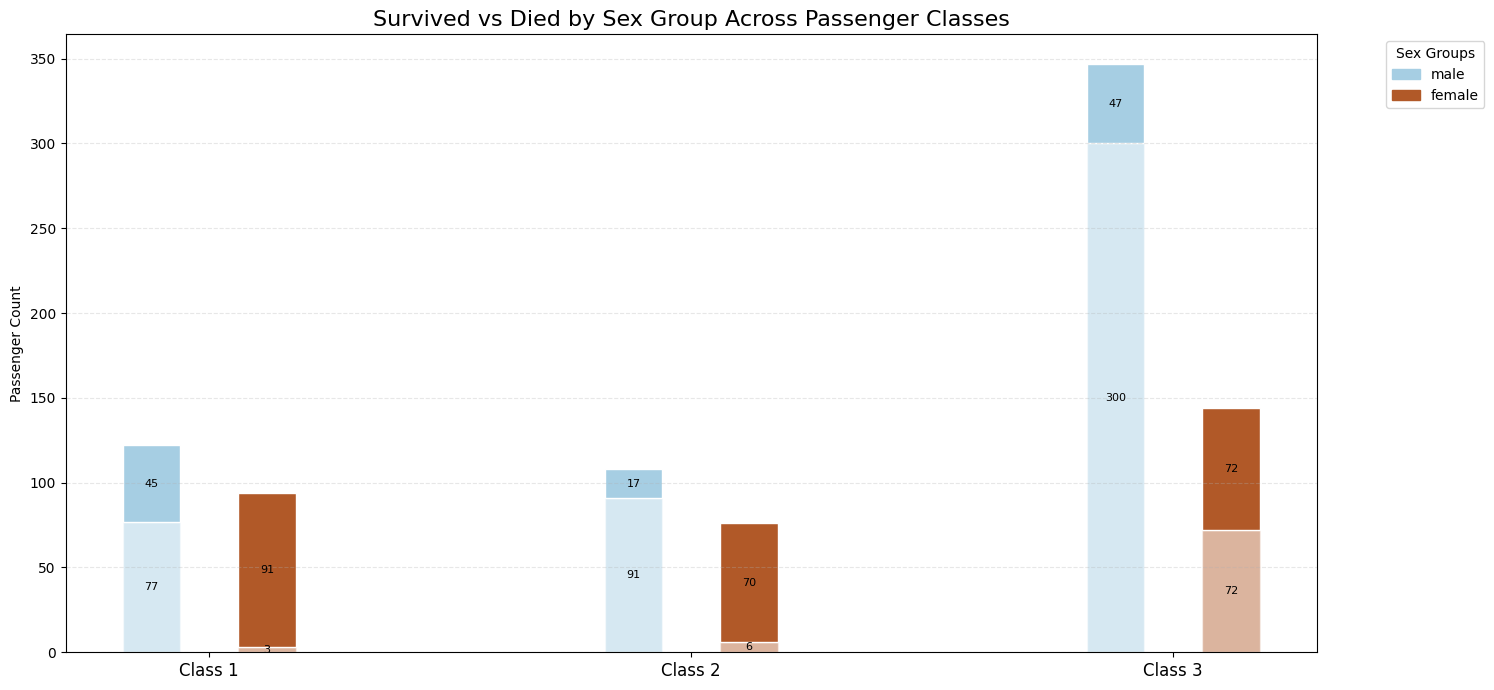

In [41]:
# Cross-tab: AgeGroup vs Pclass & Survived
ct = pd.crosstab([data_df['Pclass'], data_df['Sex']], data_df['Survived'])

classes = [1,2,3]
sex_groups = ['male','female']

survived = []
died = []

for p in classes:
    class_data = ct.loc[p]
    survived.append(class_data[1].values)
    died.append(class_data[0].values)

survived = np.array(survived)
died = np.array(died)

# Colors per age group
cmap = plt.get_cmap('Paired', len(sex_groups))
colors = {sex_groups[i]: cmap(i) for i in range(len(sex_groups))}
plt.figure(figsize=(15,7))

x = np.arange(len(classes))
width = 0.12
offsets = np.linspace(-width, width, len(sex_groups))

# Plot bars + labels
for i, sex in enumerate(sex_groups):
    # died part
    bars_died = plt.bar(x + offsets[i], died[:, i], width=width,
                        color=colors[sex], alpha=0.45, edgecolor='white')

    # survived part (darker)
    bars_surv = plt.bar(x + offsets[i], survived[:, i],
                        bottom=died[:, i], width=width,
                        color=colors[sex], edgecolor='white')

    
    # Add labels for died
    for bar in bars_died:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2, height/2,
                     f"{int(height)}", ha='center', va='center', fontsize=8)

    # Add labels for survived
    for bar_d, bar_s in zip(bars_died, bars_surv):
        h_d = bar_d.get_height()
        h_s = bar_s.get_height()
        if h_s > 0:
            plt.text(bar_s.get_x() + bar_s.get_width()/2, h_d + h_s/2,
                     f"{int(h_s)}", ha='center', va='center', fontsize=8)

# Legend fix (invisible rectangles)
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[a]) for a in sex_groups]

plt.legend(legend_handles, sex_groups, title="Sex Groups",
           bbox_to_anchor=(1.05,1), loc='upper left')

plt.xticks(x, ['Class 1','Class 2','Class 3'], fontsize=12)
plt.ylabel("Passenger Count")
plt.title("Survived vs Died by Sex Group Across Passenger Classes", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

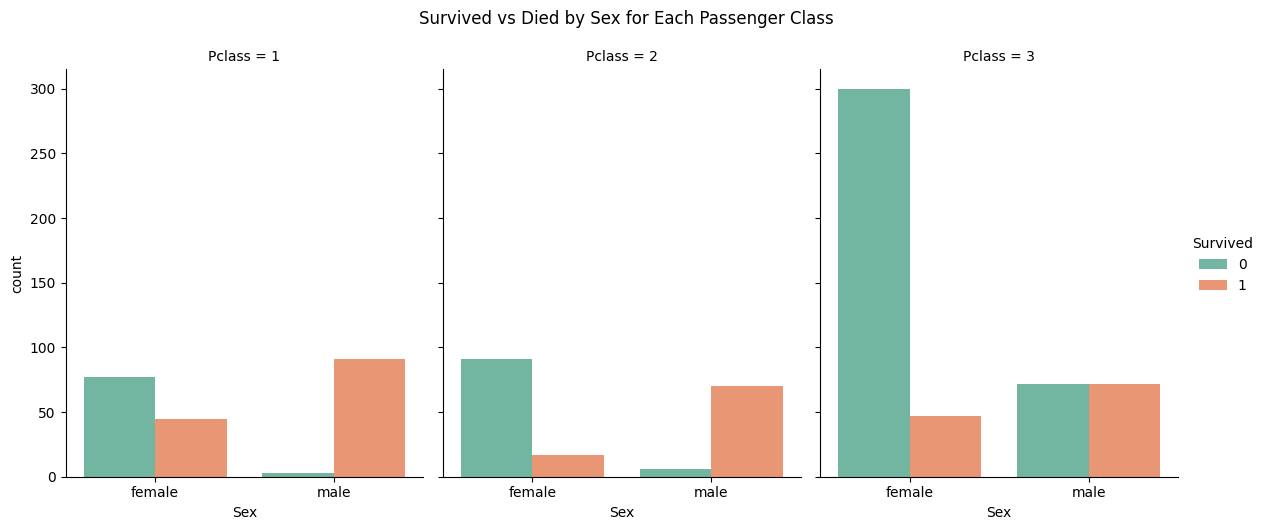

In [42]:

data_df['Sex'] = data_df['Sex'].map({0: 'female', 1: 'male'})
g = sb.catplot(
    data=data_df,
    x='Sex',
    hue='Survived',
    col='Pclass',
    kind='count',
    palette='Set2',
    height=5,
    aspect=0.8
)

g.fig.suptitle("Survived vs Died by Sex for Each Passenger Class", y=1.05)
plt.show()


In [43]:
data_df['FamilySize'] = data_df['SibSp'] + data_df['Parch'] + 1
family_survival = data_df.groupby('FamilySize')['Survived'].mean() * 100
family_counts = data_df['FamilySize'].value_counts().sort_index()

family_summary = pd.DataFrame({
    'PassengerCount': family_counts,
    'SurvivalRate(%)': family_survival
})

family_summary_sorted = family_summary.sort_values(by='SurvivalRate(%)', ascending=False)

print("Survival rate by family size:")
print(family_summary_sorted)


Survival rate by family size:
            PassengerCount  SurvivalRate(%)
FamilySize                                 
4                       29        72.413793
3                      102        57.843137
2                      161        55.279503
7                       12        33.333333
1                      537        30.353818
5                       15        20.000000
6                       22        13.636364
8                        6         0.000000
11                       7         0.000000


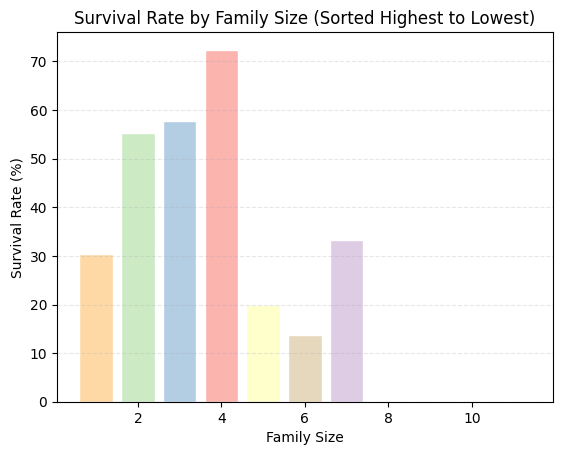

In [44]:
cmap = plt.get_cmap('Pastel1')
colors = cmap(np.linspace(0,1, len(family_summary_sorted)))

plt.bar(
    family_summary_sorted.index,
    family_summary_sorted['SurvivalRate(%)'],
    color = colors,
    edgecolor= 'white'
)

plt.xlabel('Family Size')
plt.ylabel('Survival Rate (%)')
plt.title("Survival Rate by Family Size (Sorted Highest to Lowest)")

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()